# Scoring the impact on DAVs on ISRE motifs compared to common SNPs

We have information about whether a DAV is causing the loss or gain of a motif. There are 4 categories:
1. ISE gained: either non ISRE motif becomes an ISE or an ISS becomes an ISE
2. ISE lost: either ISE becomes a non ISRE motif or ISE becomes an ISS
3. ISS gained : either non ISRE motif becomes an ISS or an ISE becomes an ISS
4. ISS lost: either ISS becomes a non ISRE motif or ISS becomes an ISE

In [1]:
whichDataSet = "HGMD"

In [5]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information pandas, matplotlib, seaborn, scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.5.0
OS Linux 4.4.0 116 generic x86_64 with Ubuntu 16.04 xenial
pandas 0.18.0
matplotlib 2.1.0
seaborn 0.8.1
scipy 1.0.0
Thu Apr 26 17:10:59 2018 EDT

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Get ISRE motifs between ISEs and ISSs
ISE_motifs = pd.read_csv("../data/ISE_ZWpaper_OverrepresentedHexamers.tsv",header=None)
ISS_motifs = pd.read_csv("../data/ISS_ZWpaper_OverrepresentedHexamers.tsv",header=None)

In [4]:
# This is a function that will find mutations that will create or destroy ISRE motifs
def getMutationsThatCreateOrDestroyISREMotifs_Modify(ISREfile, mutation_seqfile, mutationsOfInterest, mutsite, create):
    # Open the file containing ISRE motifs
    ISRE_motifs = pd.read_csv(ISREfile,header=None)
    print ISRE_motifs.head()
    # Open file with mutations and sequences surrounding mutations
    mutations_withSeq = pd.read_csv(mutation_seqfile,sep="\t",header=None)
    print mutations_withSeq.shape
    # Open file that contains IDs of mutations of interest
    muts_Of_interest = pd.read_csv(mutationsOfInterest,sep="\t",header=None)
    print muts_Of_interest.shape
    
    # Subset muations_withSeq data and only have ones that contains IDs of mutations of interest
    muts_Of_interest_withSeq = mutations_withSeq[mutations_withSeq[9].isin(muts_Of_interest[9])]
    print muts_Of_interest_withSeq.shape
    
    if create == True:
        index_for_seq = 14
    else:
        index_for_seq = 13
    
    # We just want to grab the 10 base pair sequence around the mutant since we want to check if
    # WT base or mutant base is within the 6 base pair ISRE
    muts_Seq_JustAroundMut = muts_Of_interest_withSeq[index_for_seq].str.slice(mutsite-5,mutsite+6)
    
    # These are the dictionary that are going to contain the mutation ids for mutations that result in new ISRE motifs
    # as the keys and the values will be the motifs found 
    mutations_Have_Motifs = {}
    
    # Go through every ISRE
    for motif in ISRE_motifs[0].values:
        muts_WithMotif = muts_Of_interest_withSeq[muts_Seq_JustAroundMut.str.contains(motif)][9]
        #print muts_WithMotif.shape
        #print muts_WithMotif.head()
        for mut in muts_WithMotif.values:
            mutations_Have_Motifs[mut] = mutations_Have_Motifs.get(mut,[])+[motif]

    return mutations_Have_Motifs

In [ ]:
# This is a function that will find mutations that will create or destroy ISRE motifs
# It will get the position where the mutation is found within the motif
def getMutationsThatCreateOrDestroyISREMotifs_ModifyGetIndex(ISREfile, mutation_seqfile, mutationsOfInterest, mutsite, create):
    # Open the file containing ISRE motifs
    ISRE_motifs = pd.read_csv(ISREfile,header=None)
    print ISRE_motifs.head()
    # Open file with mutations and sequences surrounding mutations
    mutations_withSeq = pd.read_csv(mutation_seqfile,sep="\t",header=None)
    print mutations_withSeq.shape
    # Open file that contains IDs of mutations of interest
    muts_Of_interest = pd.read_csv(mutationsOfInterest,sep="\t",header=None)
    print muts_Of_interest.shape
    
    # Subset muations_withSeq data and only have ones that contains IDs of mutations of interest
    muts_Of_interest_withSeq = mutations_withSeq[mutations_withSeq[9].isin(muts_Of_interest[9])]
    print muts_Of_interest_withSeq.shape
    
    if create == True:
        index_for_seq = 14
    else:
        index_for_seq = 13
    
    # We just want to grab the 10 base pair sequence around the mutant since we want to check if
    # WT base or mutant base is within the 6 base pair ISRE
    muts_Seq_JustAroundMut = muts_Of_interest_withSeq[index_for_seq].str.slice(mutsite-5,mutsite+6)
    
    # These are the dictionary that are going to contain the mutation ids for mutations that result in new ISRE motifs
    # as the keys and the values will be the motifs found 
    mutations_Have_Motifs = {}
    
    # Go through every ISRE
    for motif in ISRE_motifs[0].values:
        muts_WithMotif = muts_Of_interest_withSeq[muts_Seq_JustAroundMut.str.contains(motif)][9]
        #print muts_WithMotif.shape
        #print muts_WithMotif.head()
        for mut in muts_WithMotif.values:
            mutations_Have_Motifs[mut] = mutations_Have_Motifs.get(mut,[])+[motif]

    return mutations_Have_Motifs

In [5]:
# Looking for DAVs that are creating new ISE motifs 
DAVs_Create_New_ISEmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISE_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_DoesNotCreateSS.txt",25,True)
print len(DAVs_Create_New_ISEmotifs.keys())

        0
0  AGGTAT
1  GGGGGG
2  GGGTGG
3  GGTATT
4  TGGGGG
(7742, 15)
(7124, 13)
(7124, 15)
782


In [9]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISE hexamers
ISE_motifs_createdBY_DAVs = {}
for key,value in DAVs_Create_New_ISEmotifs.items():
    for v in value:
        ISE_motifs_createdBY_DAVs[v] = ISE_motifs_createdBY_DAVs.get(v,[]) + [key]
print len(ISE_motifs_createdBY_DAVs.keys())

87


In [6]:
# Looking for DAVs that are creating new ISS motifs 
DAVs_Create_New_ISSmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISS_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_DoesNotCreateSS.txt",25,True)
print len(DAVs_Create_New_ISSmotifs.keys())

        0
0  AACAGT
1  AATAGG
2  AATTTA
3  ACAGCT
4  ACATGA
(7742, 15)
(7124, 13)
(7124, 15)
550


In [11]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISS hexamers
ISS_motifs_createdBY_DAVs = {}
for key,value in DAVs_Create_New_ISSmotifs.items():
    for v in value:
        ISS_motifs_createdBY_DAVs[v] = ISS_motifs_createdBY_DAVs.get(v,[]) + [key]
print len(ISS_motifs_createdBY_DAVs.keys())

50


In [7]:
# Looking for DAVs that are destroying ISE motifs 
DAVs_Destroy_New_ISEmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISE_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_DoesNotCreateSS.txt",25,False)
print len(DAVs_Destroy_New_ISEmotifs.keys())

        0
0  AGGTAT
1  GGGGGG
2  GGGTGG
3  GGTATT
4  TGGGGG
(7742, 15)
(7124, 13)
(7124, 15)
820


In [12]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISE hexamers
ISE_motifs_destroyedBY_DAVs = {}
for key,value in DAVs_Destroy_New_ISEmotifs.items():
    for v in value:
        ISE_motifs_destroyedBY_DAVs[v] = ISE_motifs_destroyedBY_DAVs.get(v,[]) + [key]
print len(ISE_motifs_destroyedBY_DAVs.keys())

87


Text(0,0.5,u'Frequency of DAVs')

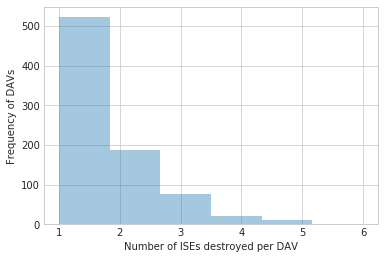

In [56]:
# Let's see a distribution of the number of ISE motifs being destroyed by the presence of a mutation 
num_ISEs_perDAV = [len(i) for i in DAVs_Destroy_New_ISEmotifs.values()]
sns.set_style("whitegrid")
ax = sns.distplot(num_ISEs_perDAV, bins=6, kde=False, rug=False);
plt.xlabel("Number of ISEs destroyed per DAV")
plt.ylabel("Frequency of DAVs")

In [8]:
# Looking for DAVs that are creating new ISS motifs 
DAVs_Destroy_New_ISSmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISS_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"Muts_DoesNotCreateSS.txt",25,False)
print len(DAVs_Destroy_New_ISSmotifs.keys())

        0
0  AACAGT
1  AATAGG
2  AATTTA
3  ACAGCT
4  ACATGA
(7742, 15)
(7124, 13)
(7124, 15)
467


In [13]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISE hexamers
ISS_motifs_destroyedBY_DAVs = {}
for key,value in DAVs_Destroy_New_ISSmotifs.items():
    for v in value:
        ISS_motifs_destroyedBY_DAVs[v] = ISS_motifs_destroyedBY_DAVs.get(v,[]) + [key]
print len(ISS_motifs_destroyedBY_DAVs.keys())

50


Text(0,0.5,u'Frequency of DAVs')

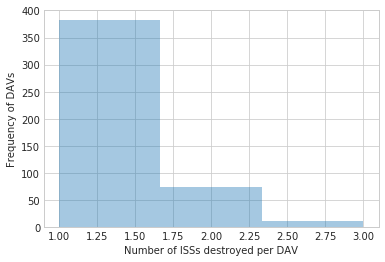

In [63]:
# Let's see a distribution of the number of ISE motifs being destroyed by the presence of a mutation 
num_ISSs_perDAV = [len(i) for i in DAVs_Destroy_New_ISSmotifs.values()]
sns.set_style("whitegrid")
ax = sns.distplot(num_ISSs_perDAV, bins=3, kde=False, rug=False);
plt.xlabel("Number of ISSs destroyed per DAV")
plt.ylabel("Frequency of DAVs")

In [80]:
# Write a function that gets counts for ISEs/ISSs gained and ISEs/ISSs lost 
def getCountForISREBehavior(ISREmotifs,\
                            ISRE_data_behavior_keyISRE,\
                            ISRE_data_oppbehavior_keyISRE,\
                            ISRE_data_oppbehavior_keyVariant,\
                            ISRE_data_oppbehaviorOppISRE_keyVariant):
    ISRE_behavior = {}
    ISRE_neutral = {}
    for ISRE in ISREmotifs[0].values:
        # Get variants that result in ISRE behavior
        vars_behavior = pd.Series(ISRE_data_behavior_keyISRE[ISRE])
        # Get variants that do the opposite behavior for same ISRE motif
        vars_oppbehaviorSameISRE_behavior = vars_behavior[vars_behavior.isin(\
                                        pd.Series(ISRE_data_oppbehavior_keyISRE[ISRE]))]
        # Get variants that compensates for behavior using other ISREs
        vars_oppbehaviorOtherISREs_behavior_step1 = vars_behavior[~vars_behavior.isin(\
                                                    vars_oppbehaviorSameISRE_behavior)]
        vars_oppbehaviorOtherISREs_behavior_step2 = vars_oppbehaviorOtherISREs_behavior_step1[\
                                                    vars_oppbehaviorOtherISREs_behavior_step1.map(\
                                                    ISRE_data_oppbehavior_keyVariant).str.len()>0]
        # Get variants that do behavior for type of ISREs but do opposite behavior for opp type of ISRE
        vars_toexclude_thisround = vars_oppbehaviorSameISRE_behavior.append(vars_oppbehaviorOtherISREs_behavior_step2)
        vars_oppbehaviorOppISRE_behavior = vars_behavior[(~vars_behavior.isin(vars_toexclude_thisround))&\
                                            (vars_behavior.isin(ISRE_data_oppbehaviorOppISRE_keyVariant.keys()))]
        # Get variants that does behavior and either results in neutral seq or from neutral seq
        vars_toexclude_thisround = vars_oppbehaviorSameISRE_behavior.append(\
                                    vars_oppbehaviorOtherISREs_behavior_step2.append(\
                                    vars_oppbehaviorOppISRE_behavior))
        vars_non_behavior = vars_behavior[~vars_behavior.isin(vars_toexclude_thisround)]
        
        ISRE_behavior[ISRE] = list(vars_oppbehaviorOppISRE_behavior.values)+list(vars_non_behavior.values)
        ISRE_neutral[ISRE] = list(vars_oppbehaviorSameISRE_behavior.values)+list(vars_oppbehaviorOtherISREs_behavior_step2.values)
        
    return [ISRE_behavior,ISRE_neutral]

### Get counts for each ISE hexamer where that ISE motif gained or ISE motif is lost

1. First for each ISE hexamer, get all mutations that are creating it. 
2. Then look for any overlap between this mutation and any mutations that are destroying ISS motifs 


In [94]:
DAVs_ISEs_gained, DAVs_ISEsgained_neutral = getCountForISREBehavior(ISE_motifs,ISE_motifs_createdBY_DAVs, ISE_motifs_destroyedBY_DAVs, DAVs_Destroy_New_ISEmotifs, DAVs_Destroy_New_ISSmotifs)
DAVs_ISEs_lost, DAVs_ISEslost_neutral = getCountForISREBehavior(ISE_motifs,ISE_motifs_destroyedBY_DAVs, ISE_motifs_createdBY_DAVs, DAVs_Create_New_ISEmotifs, DAVs_Create_New_ISSmotifs)

### Get counts for each ISS hexamer where that ISS motif gained or ISS motif is lost

First for each ISS hexamer, get all mutations that are creating it. Then look for any overlap between this mutation and any mutations that are destroying ISE motifs 

In [105]:
DAVs_ISSs_gained, DAVs_ISSsgained_neutral = getCountForISREBehavior(ISS_motifs,ISS_motifs_createdBY_DAVs, ISS_motifs_destroyedBY_DAVs, DAVs_Destroy_New_ISSmotifs, DAVs_Destroy_New_ISEmotifs)
DAVs_ISSs_lost, DAVs_ISSslost_neutral = getCountForISREBehavior(ISS_motifs,ISS_motifs_destroyedBY_DAVs, ISS_motifs_createdBY_DAVs, DAVs_Create_New_ISSmotifs, DAVs_Create_New_ISEmotifs)

## Re-do above analysis for common SNPs

In [25]:
whichDataSet = "CommonSNPs"

In [27]:
# Looking for  that are creating new ISE motifs
SNPs_Create_New_ISEmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISE_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_DoesNotCreateSS.txt",25,True)
print len(SNPs_Create_New_ISEmotifs.keys())

        0
0  AGGTAT
1  GGGGGG
2  GGGTGG
3  GGTATT
4  TGGGGG
(2536534, 15)
(2442426, 13)
(2442426, 15)
235855


In [29]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISE hexamers
ISE_motifs_createdBY_SNPs = {}
for key,value in SNPs_Create_New_ISEmotifs.items():
    for v in value:
        ISE_motifs_createdBY_SNPs[v] = ISE_motifs_createdBY_SNPs.get(v,[]) + [key]
print len(ISE_motifs_createdBY_SNPs.keys())

87


In [28]:
# Looking for  that are creating new ISS motifs
SNPs_Create_New_ISSmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISS_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_DoesNotCreateSS.txt",25,True)
print len(SNPs_Create_New_ISSmotifs.keys())

        0
0  AACAGT
1  AATAGG
2  AATTTA
3  ACAGCT
4  ACATGA
(2536534, 15)
(2442426, 13)
(2442426, 15)
165624


In [30]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISS hexamers
ISS_motifs_createdBY_SNPs = {}
for key,value in SNPs_Create_New_ISSmotifs.items():
    for v in value:
        ISS_motifs_createdBY_SNPs[v] = ISS_motifs_createdBY_SNPs.get(v,[]) + [key]
print len(ISS_motifs_createdBY_SNPs.keys())

50


In [31]:
# Looking for SNPs that are destroying new ISE motifs
SNPs_Destroy_New_ISEmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISE_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_DoesNotCreateSS.txt",25,False)
print len(SNPs_Destroy_New_ISEmotifs.keys())

        0
0  AGGTAT
1  GGGGGG
2  GGGTGG
3  GGTATT
4  TGGGGG
(2536534, 15)
(2442426, 13)
(2442426, 15)
236375


In [32]:
# Make the opposite dictionary, the values are the SNPs and the keys are the ISE hexamers
ISE_motifs_destroyedBY_SNPs = {}
for key,value in SNPs_Destroy_New_ISEmotifs.items():
    for v in value:
        ISE_motifs_destroyedBY_SNPs[v] = ISE_motifs_destroyedBY_SNPs.get(v,[]) + [key]
print len(ISE_motifs_destroyedBY_SNPs.keys())

87


Text(0,0.5,u'Frequency of SNPs')

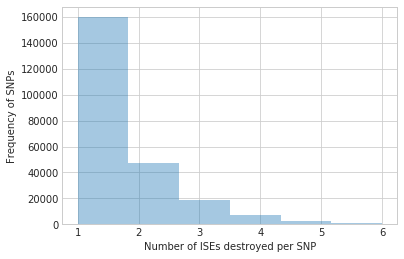

In [59]:
# Let's see a distribution of the number of ISE motifs being destroyed by the presence of a SNP
num_ISEs_perSNP = [len(i) for i in SNPs_Destroy_New_ISEmotifs.values()]
sns.set_style("whitegrid")
ax = sns.distplot(num_ISEs_perSNP, bins=6, kde=False, rug=False);
plt.xlabel("Number of ISEs destroyed per SNP")
plt.ylabel("Frequency of SNPs")

In [33]:
# Looking for SNPs that are destroying new ISS motifs
SNPs_Destroy_New_ISSmotifs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISS_ZWpaper_OverrepresentedHexamers.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_DoesNotCreateSS.txt",25,False)
print len(SNPs_Destroy_New_ISSmotifs.keys())

        0
0  AACAGT
1  AATAGG
2  AATTTA
3  ACAGCT
4  ACATGA
(2536534, 15)
(2442426, 13)
(2442426, 15)
159865


In [34]:
# Make the opposite dictionary, the values are the mutations and the keys are the ISE hexamers
ISS_motifs_destroyedBY_SNPs = {}
for key,value in SNPs_Destroy_New_ISSmotifs.items():
    for v in value:
        ISS_motifs_destroyedBY_SNPs[v] = ISS_motifs_destroyedBY_SNPs.get(v,[]) + [key]
print len(ISS_motifs_destroyedBY_SNPs.keys())

50


Text(0,0.5,u'Frequency of SNPs')

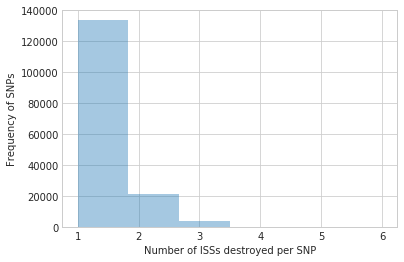

In [60]:
# Let's see a distribution of the number of ISE motifs being destroyed by the presence of a SNP
num_ISSs_perSNP = [len(i) for i in SNPs_Destroy_New_ISSmotifs.values()]
sns.set_style("whitegrid")
ax = sns.distplot(num_ISSs_perSNP, bins=6, kde=False, rug=False);
plt.xlabel("Number of ISSs destroyed per SNP")
plt.ylabel("Frequency of SNPs")

### Get counts for each ISE hexamer where that ISE motif gained or ISE motif is lost - common SNP edition

First for each ISE hexamer, get all SNPs that are creating it. Then look for any overlap between this SNP and any SNPs that are destroying ISS motifs 


In [107]:
SNPs_ISEs_gained, SNPs_ISEsgained_neutral = getCountForISREBehavior(ISE_motifs,ISE_motifs_createdBY_SNPs, ISE_motifs_destroyedBY_SNPs, SNPs_Destroy_New_ISEmotifs, SNPs_Destroy_New_ISSmotifs)
SNPs_ISEs_lost, SNPs_ISEslost_neutral = getCountForISREBehavior(ISE_motifs,ISE_motifs_destroyedBY_SNPs, ISE_motifs_createdBY_SNPs, SNPs_Create_New_ISEmotifs, SNPs_Create_New_ISSmotifs)

### Get counts for each ISS hexamer where that ISS motif gained or ISS motif is lost - common SNP edition

First for each ISS hexamer, get all SNPs that are creating it. Then look for any overlap between this SNP and any SNPs that are destroying ISE motifs 

In [108]:
SNPs_ISSs_gained, SNPs_ISSsgained_neutral = getCountForISREBehavior(ISS_motifs,ISS_motifs_createdBY_SNPs, ISS_motifs_destroyedBY_SNPs, SNPs_Destroy_New_ISSmotifs, SNPs_Destroy_New_ISEmotifs)
SNPs_ISSs_lost, SNPs_ISSslost_neutral = getCountForISREBehavior(ISS_motifs,ISS_motifs_destroyedBY_SNPs, ISS_motifs_createdBY_SNPs, SNPs_Create_New_ISSmotifs, SNPs_Create_New_ISEmotifs)

## Calculate odds ratio for hexamers

In [126]:
# Get the odds ratio for ISEs gain
# Add 0.5 as pseudo count
OR_allISEgain = []
OR_allISElost = []
for ISE in ISE_motifs[0].values:
    total_events_DAVs_ISE = len(DAVs_ISEs_gained.get(ISE,[])) + len(DAVs_ISEs_lost.get(ISE,[])) + \
                            len(DAVs_ISEsgained_neutral.get(ISE,[])) + len(DAVs_ISEslost_neutral.get(ISE,[]))
    prob_ISEgain_DAVs = (len(DAVs_ISEs_gained.get(ISE,[]))+0.5)/(float(total_events_DAVs_ISE)+2)
    prob_ISElost_DAVs = (len(DAVs_ISEs_lost.get(ISE,[]))+0.5)/(float(total_events_DAVs_ISE)+2)
    total_events_SNPs_ISE = len(SNPs_ISEs_gained.get(ISE,[])) + len(SNPs_ISEs_lost.get(ISE,[])) + \
                            len(SNPs_ISEsgained_neutral.get(ISE,[])) + len(SNPs_ISEslost_neutral.get(ISE,[]))
    prob_ISEgain_SNPs = (len(SNPs_ISEs_gained.get(ISE,[]))+0.5)/(float(total_events_SNPs_ISE)+2)
    prob_ISElost_SNPs = (len(SNPs_ISEs_lost.get(ISE,[]))+0.5)/(float(total_events_SNPs_ISE)+2)
    OR_for_ISEgain = (prob_ISEgain_DAVs/(1-prob_ISEgain_DAVs))/(prob_ISEgain_SNPs/(1-prob_ISEgain_SNPs))
    OR_allISEgain.append(OR_for_ISEgain)
    OR_for_ISElost = (prob_ISElost_DAVs/(1-prob_ISElost_DAVs))/(prob_ISElost_SNPs/(1-prob_ISElost_SNPs))
    OR_allISElost.append(OR_for_ISElost)

In [135]:
# Get the odds ratio for ISSs gain
# Add 0.5 as pseudo count
OR_allISSgain = []
OR_allISSlost = []
for ISS in ISS_motifs[0].values:
    total_events_DAVs_ISS = len(DAVs_ISSs_gained.get(ISS,[])) + len(DAVs_ISSs_lost.get(ISS,[])) + \
                            len(DAVs_ISSsgained_neutral.get(ISS,[])) + len(DAVs_ISSslost_neutral.get(ISS,[]))
    prob_ISSgain_DAVs = (len(DAVs_ISSs_gained.get(ISS,[]))+0.5)/(float(total_events_DAVs_ISS)+2)
    prob_ISSlost_DAVs = (len(DAVs_ISSs_lost.get(ISS,[]))+0.5)/(float(total_events_DAVs_ISS)+2)
    total_events_SNPs_ISS = len(SNPs_ISSs_gained.get(ISS,[])) + len(SNPs_ISSs_lost.get(ISS,[])) + \
                            len(SNPs_ISSsgained_neutral.get(ISS,[])) + len(SNPs_ISSslost_neutral.get(ISS,[]))
    prob_ISSgain_SNPs = (len(SNPs_ISSs_gained.get(ISS,[]))+0.5)/(float(total_events_SNPs_ISS)+2)
    prob_ISSlost_SNPs = (len(SNPs_ISSs_lost.get(ISS,[]))+0.5)/(float(total_events_SNPs_ISS)+2)
    OR_for_ISSgain = (prob_ISSgain_DAVs/(1-prob_ISSgain_DAVs))/(prob_ISSgain_SNPs/(1-prob_ISSgain_SNPs))
    OR_allISSgain.append(OR_for_ISSgain)
    OR_for_ISSlost = (prob_ISSlost_DAVs/(1-prob_ISSlost_DAVs))/(prob_ISSlost_SNPs/(1-prob_ISSlost_SNPs))
    OR_allISSlost.append(OR_for_ISSlost)

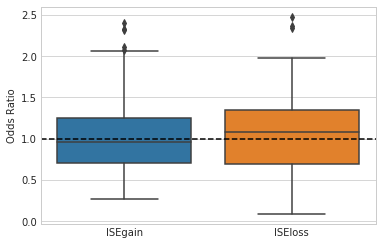

In [154]:
# Plot boxplot of distributions of ISE gain and loss
df_ISE = pd.DataFrame({"ISEgain":OR_allISEgain,"ISEloss":OR_allISElost})
df_ISE.head()
sns.boxplot(data=df_ISE)
#sns.swarmplot(data=df_ISE)
plt.ylabel('Odds Ratio')
plt.axhline(y=1,linestyle='dashed',color='black')

In [144]:
scipy.stats.mannwhitneyu(OR_allISEgain, OR_allISElost, use_continuity=True, alternative="two-sided")

MannwhitneyuResult(statistic=3565.0, pvalue=0.50978755707070911)

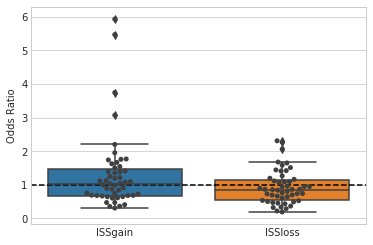

In [152]:
# Plot boxplot of distributions of ISS gain and loss
df_ISS = pd.DataFrame({"ISSgain":OR_allISSgain,"ISSloss":OR_allISSlost})
df_ISS.head()
sns.boxplot(data=df_ISS)
sns.swarmplot(data=df_ISS,color=".25")
plt.ylabel('Odds Ratio')
plt.axhline(y=1,linestyle='dashed',color='black')

In [145]:
scipy.stats.mannwhitneyu(OR_allISSgain, OR_allISSlost, use_continuity=True, alternative="two-sided")

MannwhitneyuResult(statistic=1508.0, pvalue=0.075871700432894693)

## Use scoring system developed in Mort et al. 2014

"To express the relationship between disease and neutral variants and their differential distributions with respect to loss or gain of an ESE or ESS"

In [ ]:
# This score S(t,i,dav) and S(t,i,snp) where t is the type of behavior (ISEgain, ISEloss, ISSgain, ISSloss)
# and i is all the hexamers for the behavior 
# sum(S(t,i,dav))=1 and sum(S(t,i,snp))=1
S_DAV_preNormalized_ISEgain = []
S_SNP_preNormalized_ISEgain = []
S_DAV_preNormalized_ISEloss = []
S_SNP_preNormalized_ISEloss = []
for ISE in ISE_motifs[0].values:
        S_DAV_preNormalized_ISEgain.append([ISE,len(DAVs_ISEs_gained.get(ISE,[]))+0.25])
        S_DAV_preNormalized_ISEloss.append([ISE,len(DAVs_ISEs_lost.get(ISE,[]))+0.25])
        S_SNP_preNormalized_ISEgain.append([ISE,len(SNPs_ISEs_gained.get(ISE,[]))+0.25])
        S_SNP_preNormalized_ISEloss.append([ISE,len(SNPs_ISEs_lost.get(ISE,[]))+0.25])        